With this code we are suposed to test our principal code by computing the total cross-section of alastic collisions between hard spheres. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
from matplotlib import animation

In [2]:
def initial_loc_vel_assigner(Natoms, targets):
    particles_properties = {i:[] for i in range(Natoms)}
    for i in range(Natoms):
        x = np.random.uniform(low = -Rbeam-1, high = Rbeam)
        y = np.random.uniform(low = -Rbeam, high = Rbeam)
        z = np.random.uniform(low = -Rbeam, high = Rbeam)
        if i < Natoms-targets:
            particles_properties[i] = [np.array([x-L, y, z]), np.array([p1, 0, 0]), 'b', mp, Rp, q1]
        else:
            particles_properties[i] = [np.array([0, 0, 0]), np.array([p2, 0, 0]), 'r', mt, Rt, q2]
    return particles_properties

In [3]:
def checkCollisions(Natoms, particles_properties):
    hitlist = []
    for i in particles_properties:
        ai = particles_properties[i][0]
        for j in particles_properties:
            if j <i:
                aj = particles_properties[j][0]
                r2 = particles_properties[j][4] + particles_properties[i][4]
                dr = ai - aj
                if np.linalg.norm(dr) < r2: hitlist.append([i,j])
    return np.array(hitlist)

In [156]:
def pos_update(particles_properties):
    global collision
    for i in particles_properties:
        particles_properties[i][0] = particles_properties[i][0] + dt*particles_properties[i][1]/particles_properties[i][3]
        particles_properties[i][1] = particles_properties[i][1] + dt*lorentz_force(q, particles_properties[i][1], B, particles_properties[i][3])
    
    for index in particle_track:
        particle_trajectory.append([particles_properties[int(index)][0].tolist(),int(index)])
    
    hitlist = checkCollisions(Natoms, particles_properties)
    
    for ij in hitlist:
        i = ij[0]
        j = ij[1]
        vrel = particles_properties[j][1]/particles_properties[j][3]-particles_properties[i][1]/particles_properties[i][3]
        rrel = particles_properties[i][0]-particles_properties[j][0]
        if np.linalg.norm(vrel)**2 == 0: continue; 
        if np.linalg.norm(rrel) > particles_properties[i][4] + particles_properties[j][4]: continue 
        collision = collision + 1
        particle_track.append(i)
        particle_track.append(j)
        particle_trajectory.append([particles_properties[i][0].tolist(),i])
        particle_trajectory.append([particles_properties[j][0].tolist(),j])
        particles_properties  = colision_resolver(i, j, particles_properties) 
        particle_trajectory.append([particles_properties[i][0].tolist(),i])
        particle_trajectory.append([particles_properties[j][0].tolist(),j])
    
    return particles_properties

In [5]:
def colision_resolver(i, j, particles_properties):
    ptot = particles_properties[i][1]+particles_properties[j][1]
    pos_i = particles_properties[i][0]
    pos_j = particles_properties[j][0]
    vi = particles_properties[i][1]/particles_properties[i][3]
    vj = particles_properties[j][1]/particles_properties[j][3]
    vrel = vj-vi
    rrel = pos_i-pos_j
    dx = np.dot(rrel, vrel/np.linalg.norm(vrel))
    dy = np.linalg.norm(np.cross(rrel, vrel/np.linalg.norm(vrel)))
    alpha = np.arcsin(dy/(particles_properties[i][4] + particles_properties[j][4])) 
    d = (particles_properties[i][4] + particles_properties[j][4])*np.cos(alpha)-dx 
    deltat = d/np.linalg.norm(vrel) 
    pos_i = pos_i-vi*deltat
    pos_j = pos_j-vj*deltat
    mtot = particles_properties[i][3] + particles_properties[j][3]
    pcmi = particles_properties[i][1] - ptot*particles_properties[i][3]/mtot
    pcmj = particles_properties[j][1] - ptot*particles_properties[j][3]/mtot
    rrel = rrel/np.linalg.norm(rrel)
    pcmi = pcmi-2*np.dot(pcmi, rrel)*rrel 
    pcmj = pcmj-2*np.dot(pcmj, rrel)*rrel
    particles_properties[i][1] = pcmi + ptot*particles_properties[i][3]/mtot
    particles_properties[j][1] = pcmj + ptot*particles_properties[j][3]/mtot
    particles_properties[i][0] = pos_i + (particles_properties[i][1]/particles_properties[i][3])*deltat 
    particles_properties[j][0] = pos_j + (particles_properties[j][1]/particles_properties[j][3])*deltat
    particles_properties[j][2] = 'cyan'    
    return particles_properties

In [6]:
def lorentz_force(q, p, B, mass):
    v = p/mass
    return q * np.cross(v, B)

In [65]:
def Animation(frame):
    global particles_properties
    
    particles_properties = pos_update(particles_properties)
    
    x = [particles_properties[i][0][0] for i in particles_properties]
    y = [particles_properties[i][0][1] for i in particles_properties]
    z = [particles_properties[i][0][2] for i in particles_properties]
    color_array = [particles_properties[i][2] for i in particles_properties]

    trajectories = {i:[] for i in particle_track}
    for i in particle_trajectory: trajectories[i[1]].append(i[0])
        
    ax.clear()
    plot_geeks = ax.scatter(x, y, z, marker='o', color = color_array)  
    for index in particle_track:
        ax.plot([item[0] for item in trajectories[index]], [item[1] for item in trajectories[index]], [item[2] for item in trajectories[index]], color = particles_properties[index][2], linestyle='dashed')
    ax.set_title("Time = {:.2f}".format(frame*dt))
    ax.scatter(10, 10, 10, marker='o', color = 'b', label = 'Projectile')  
    ax.scatter(10, 10, 10, marker='o', color = 'r', label = 'Target') 
    ax.scatter(10, 10, 10, marker='o', color = 'cyan', label = 'Deflected projectile') 
    ax.legend()
    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.axes.set_xlim3d(left = -(L+Rbeam), right = (L+Rbeam)) 
    ax.axes.set_ylim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
    ax.axes.set_zlim3d(bottom = -(L+Rbeam), top = (L+Rbeam))
    plt.show()

In [139]:
T = 50

Natoms0 = 100
targets = 1
Natoms = Natoms0

Rbeam = 0.5
L = 5

mp = 1 # projectile mass
mt = 1000000 # huge target mass
Rp = 0.0000001 # small projectile radius
Rt = 0.5 # regular target radius
dt = 0.1

p1 = 1.5
p2 = 0.0 # No movement for the target

q1 = -1
q2 = 1 

B = np.array([0, 0, 0.00]) # No magnetic field in this case


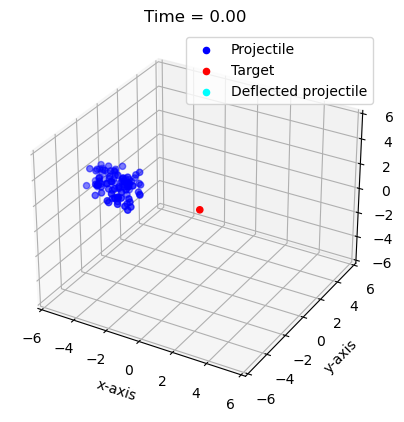

In [121]:
particles_properties = initial_loc_vel_assigner(Natoms, targets)

collision = 0

# Delete the particles that where overlaping in the begining
hitlist = checkCollisions(Natoms, particles_properties)

if len(hitlist) > 0:
    for i in hitlist[:,0]: 
        if i in particles_properties: 
            particles_properties.pop(i) 

Natoms = Natoms-len(hitlist)

particle_track = []
particle_trajectory = []

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig, Animation, frames = 60, interval=50, repeat=False)



# Display the animation using HTML
HTML(ani.to_jshtml())

In [157]:
# For faster computations of the cross section

particles_properties = initial_loc_vel_assigner(Natoms0, targets)
collision = 0

# Delete the particles that where overlaping in the begining
hitlist = checkCollisions(Natoms0, particles_properties)

if len(hitlist) > 0:
    for i in hitlist[:,0]: 
        if i in particles_properties: 
            particles_properties.pop(i) 

Natoms = Natoms-len(hitlist)

particle_track = []
particle_trajectory = []

for i in range(T):
    particles_properties = pos_update(particles_properties)


In [160]:
A = np.pi*(Rbeam)**2
print('The total number of collisions was:', collision)
print('The computed cross-sections is:', (A*collision)/Natoms)
print('The theoretical cross-section is:', np.pi*(Rt**2))

The total number of collisions was: 393
The computed cross-sections is: 0.786
The theoretical cross-section is: 0.7853981633974483
